In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Linear Models for regression

In [3]:
from sklearn.datasets import make_regression
from sklearn.cross_validation import train_test_split

In [4]:
X, y, true_coeddicient = make_regression(n_samples=80, n_features=30,\
                                         n_informative=10, noise=100,\
                                        coef=True, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =5)

In [5]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)

In [6]:
X_train.shape, y_train.shape

((60, 30), (60,))

In [11]:
print("R^2 on training set: %f" % linear_regression.score(X_train, y_train))

R^2 on training set: 0.877842


In [12]:
print("R^2 on training set: %f" % linear_regression.score(X_test, y_test))

R^2 on training set: 0.492723


In [13]:
from sklearn.metrics import r2_score
print(r2_score(np.dot(X, true_coeddicient), y))

0.729977472078


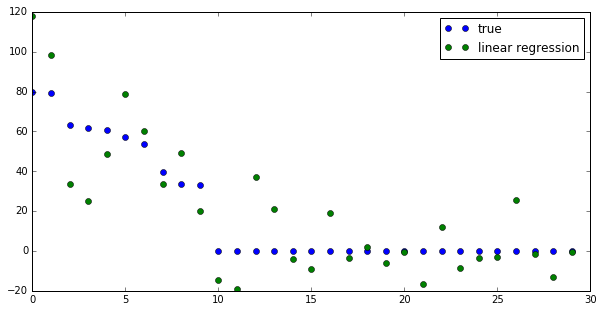

In [23]:
plt.figure(figsize=(10,5))
coefficient_sorting = np.argsort(true_coeddicient)[::-1]
plt.plot(true_coeddicient[coefficient_sorting], "o",label="true")
plt.plot(linear_regression.coef_[coefficient_sorting],"o", label="linear regression")
plt.legend()

# Ridge Regression (L2 penalty)

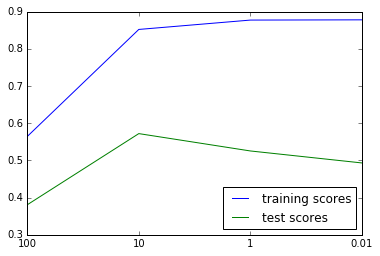

In [27]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100,10,1,0.01]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge
    
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [100,10,1,0.01])
plt.legend(loc="best")

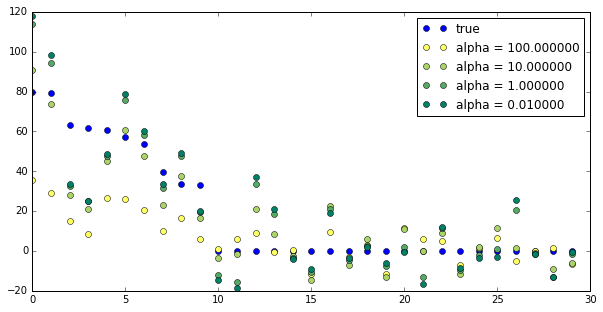

In [31]:
plt.figure(figsize=(10,5))
plt.plot(true_coeddicient[coefficient_sorting], "o",label="true", c="b")

for i, alpha in enumerate([100,10,1,0.01]):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %f" %alpha,c=plt.cm.summer_r(i/3.))
    plt.legend(loc="best")

In [32]:
## high regularizatoin means coeff is closer to 0

# Lasso (L1 penalty)

### It is good for feature selectoin in higher dimension space cause for non relevant features is vaue of coefficient is 0 or closer to 0

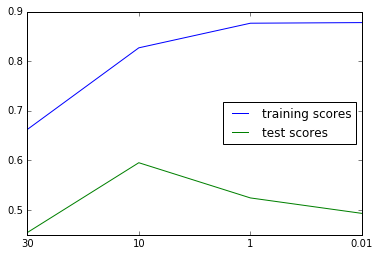

In [33]:
from sklearn.linear_model import Lasso
lasso_models = {}
training_scores = []
test_scores = []

for alpha in [30,10,1,0.01]:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    training_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    lasso_models[alpha] = lasso
    
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [30,10,1,0.01])
plt.legend(loc="best")

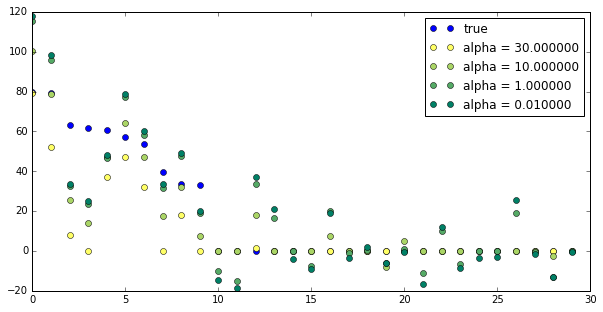

In [34]:
plt.figure(figsize=(10,5))
plt.plot(true_coeddicient[coefficient_sorting], "o",label="true", c="b")

for i, alpha in enumerate([30,10,1,0.01]):
    plt.plot(lasso_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %f" %alpha,c=plt.cm.summer_r(i/3.))
    plt.legend(loc="best")

# Linear models for classification

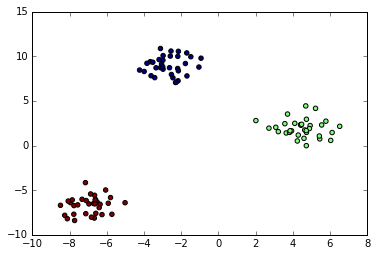

In [35]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
plt.scatter(X[:,0], X[:, 1], c=y)

In [36]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


In [37]:
linear_svm.coef_

array([[-0.17492409,  0.23140897],
       [ 0.47621466, -0.06936486],
       [-0.18914337, -0.20399611]])

In [38]:
linear_svm.intercept_

array([-1.07745309,  0.13140999, -0.08604828])

(-10, 8)

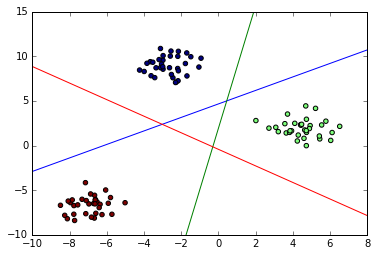

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y)
line = np.linspace(-15,15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line*coef[0] + intercept) /coef[1])
plt.ylim(-10,15)
plt.xlim(-10,8)